## **Yellowbrick Machine Learning Visualizations Using Breast Cancer Dataset for Model Interpretability**

In [5]:
!pip install yellowbrick -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Yellowbrick imports
from yellowbrick.classifier import (
    ClassificationReport, ConfusionMatrix,
    ClassPredictionError, ROCAUC
)
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.model_selection import (
    ValidationCurve, LearningCurve, CVScores
)
from yellowbrick.features import (
    Rank2D, RadViz, ParallelCoordinates, PCA as PCAVisualizer,
    Manifold
)
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.target import ClassBalance

# Set style for better visualizations (Colab compatible)
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

In [6]:
def load_and_explore_data():
    """Load and initially explore the breast cancer dataset"""
    print("🔬 Loading Breast Cancer Dataset...")
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name='diagnosis')

    print(f"Dataset shape: {X.shape}")
    print(f"Classes: {dict(zip(data.target_names, [0, 1]))}")
    print(f"Class distribution: {np.bincount(y)}")

    return X, y, data

In [7]:
def visualize_target_distribution(y, data):
    """Visualize class distribution"""
    print("\n 1. Target Distribution Analysis")

    fig, ax = plt.subplots(figsize=(10, 6))
    visualizer = ClassBalance(labels=data.target_names)
    visualizer.fit(y)
    visualizer.show()
    plt.title("Class Distribution in Breast Cancer Dataset", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.close()  # Close figure to prevent memory issues in Colab

In [10]:
def feature_analysis_visualizations(X, y, data):
    """Create feature analysis visualizations"""
    print("\n 2. Feature Analysis Visualizations")

    # Feature ranking correlation
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Rank2D - Pearson correlation
    visualizer = Rank2D(features=X.columns[:10], algorithm='pearson')
    visualizer.fit(X.iloc[:, :10], y)
    visualizer.show(ax=axes[0,0])
    axes[0,0].set_title("Feature Correlation (Pearson)", fontweight='bold')

    # Rank2D - Covariance
    visualizer = Rank2D(features=X.columns[:10], algorithm='covariance')
    visualizer.fit(X.iloc[:, :10], y)
    visualizer.show(ax=axes[0,1])
    axes[0,1].set_title("Feature Covariance", fontweight='bold')

    # RadViz - Radial visualization
    visualizer = RadViz(classes=data.target_names, features=X.columns[:8])
    visualizer.fit(X.iloc[:, :8], y)
    visualizer.show(ax=axes[1,0])
    axes[1,0].set_title("RadViz - Feature Relationships", fontweight='bold')

    # Parallel Coordinates
    visualizer = ParallelCoordinates(classes=data.target_names, features=X.columns[:6])
    visualizer.fit(X.iloc[:, :6], y)
    visualizer.show(ax=axes[1,1])
    axes[1,1].set_title("Parallel Coordinates", fontweight='bold')

    plt.tight_layout()
    plt.show()
    plt.close()

In [14]:
def dimensionality_reduction_viz(X, y, data):
    """Visualize dimensionality reduction techniques"""
    print("\n 3. Dimensionality Reduction Visualizations")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # PCA Visualization
    visualizer = PCAVisualizer(scale=True, classes=data.target_names)
    visualizer.fit_transform(X, y)
    visualizer.show(ax=axes[0])
    axes[0].set_title("PCA Projection", fontweight='bold')

    # Manifold Visualization (t-SNE)
    print("...Running t-SNE (this may take a moment)...")
    visualizer = Manifold(manifold='tsne', classes=data.target_names)
    visualizer.fit_transform(X, y)
    visualizer.show(ax=axes[1])
    axes[1].set_title("t-SNE Manifold", fontweight='bold')

    plt.tight_layout()
    plt.show()
    plt.close()

In [13]:
def clustering_analysis(X):
    """Perform clustering analysis with Yellowbrick"""
    print("\n 4. Clustering Analysis")

    # Scale features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # K-Elbow method for optimal clusters
    print("...Computing elbow method...")
    visualizer = KElbowVisualizer(KMeans(), k=(2,12))
    visualizer.fit(X_scaled)
    visualizer.show(ax=axes[0])
    axes[0].set_title("Elbow Method for Optimal k", fontweight='bold')

    # Silhouette analysis
    print("...Computing silhouette analysis...")
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=42))
    visualizer.fit(X_scaled)
    visualizer.show(ax=axes[1])
    axes[1].set_title("Silhouette Analysis (k=2)", fontweight='bold')

    plt.tight_layout()
    plt.show()
    plt.close()

In [17]:
def model_evaluation_visualizations(X, y, data):
    """Create comprehensive model evaluation visualizations"""
    print("\n 5. Model Evaluation Visualizations")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(probability=True, random_state=42)
    }
    # Train models and create visualizations
    for name, model in models.items():
        print(f"\n--- {name} Evaluation ---")

        if name == 'Random Forest':
            print(f"   Training {name}...")
            model.fit(X_train, y_train)
            X_train_model, X_test_model = X_train, X_test
        else:
            print(f"   Training {name}...")
            model.fit(X_train_scaled, y_train)
            X_train_model, X_test_model = X_train_scaled, X_test_scaled

        # Create subplots for this model
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle(f'{name} - Comprehensive Evaluation', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        visualizer = ConfusionMatrix(model, classes=data.target_names)
        visualizer.fit(X_train_model, y_train)
        visualizer.score(X_test_model, y_test)
        visualizer.show(ax=axes[0,0])
        axes[0,0].set_title("Confusion Matrix")

        # 2. Classification Report
        visualizer = ClassificationReport(model, classes=data.target_names, support=True)
        visualizer.fit(X_train_model, y_train)
        visualizer.score(X_test_model, y_test)
        visualizer.show(ax=axes[0,1])
        axes[0,1].set_title("Classification Report")

        # 3. ROC Curve
        visualizer = ROCAUC(model, classes=data.target_names)
        visualizer.fit(X_train_model, y_train)
        visualizer.score(X_test_model, y_test)
        visualizer.show(ax=axes[0,2])
        axes[0,2].set_title("ROC-AUC Curve")

        # 4. Precision-Recall Curve
        visualizer = PrecisionRecallCurve(model, classes=data.target_names)
        visualizer.fit(X_train_model, y_train)
        visualizer.score(X_test_model, y_test)
        visualizer.show(ax=axes[1,0])
        axes[1,0].set_title("Precision-Recall Curve")

        # 5. Class Prediction Error
        visualizer = ClassPredictionError(model, classes=data.target_names)
        visualizer.fit(X_train_model, y_train)
        visualizer.score(X_test_model, y_test)
        visualizer.show(ax=axes[1,1])
        axes[1,1].set_title("Class Prediction Error")

        # 6. Learning Curve
        print(f"... Computing learning curve for {name}...")
        visualizer = LearningCurve(model, cv=5, scoring='f1')
        visualizer.fit(X_train_model, y_train)
        visualizer.show(ax=axes[1,2])
        axes[1,2].set_title("Learning Curve")

        plt.tight_layout()
        plt.show()
        plt.close()

In [18]:
def model_selection_visualizations(X, y):
    """Create model selection and validation visualizations"""
    print("\n 6. Model Selection & Validation")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Validation Curve
    print("   Computing validation curve...")
    model = RandomForestClassifier(random_state=42)
    visualizer = ValidationCurve(
        model, param_name='n_estimators', param_range=range(10, 101, 10),
        cv=5, scoring='f1'
    )
    visualizer.fit(X_train, y_train)
    visualizer.show(ax=axes[0])
    axes[0].set_title("Validation Curve - Random Forest", fontweight='bold')

    # Cross-validation scores comparison
    print("   Computing cross-validation scores...")
    models = [
        RandomForestClassifier(random_state=42),
        LogisticRegression(random_state=42, max_iter=1000),
        SVC(random_state=42)
    ]
    model_names = ['Random Forest', 'Logistic Regression', 'SVM']

    visualizer = CVScores(
        models[0], cv=5, scoring='f1'
    )
    visualizer.fit(X_train, y_train)
    visualizer.show(ax=axes[1])
    axes[1].set_title("Cross-Validation Scores", fontweight='bold')

    plt.tight_layout()
    plt.show()
    plt.close()

In [19]:
def create_summary_insights(X, y, data):
    """Create a summary of key insights"""
    print("\n Key Insights Summary")
    print("=" * 50)

    # Basic statistics
    print(f"📊 Dataset Overview:")
    print(f"   • Total samples: {len(X)}")
    print(f"   • Features: {len(X.columns)}")
    print(f"   • Malignant cases: {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
    print(f"   • Benign cases: {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")

    # Feature insights
    print(f"\n🔍 Feature Analysis:")
    print(f"   • Most correlated features with target:")
    correlations = X.corrwith(pd.Series(y)).abs().sort_values(ascending=False)
    for i, (feature, corr) in enumerate(correlations.head(3).items()):
        print(f"     {i+1}. {feature}: {corr:.3f}")

    # Model performance preview
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

    print(f"\n🤖 Model Performance Preview:")
    print(f"   • Random Forest F1-Score: {rf_scores.mean():.3f} (±{rf_scores.std():.3f})")
    print(f"   • This suggests {'excellent' if rf_scores.mean() > 0.95 else 'good' if rf_scores.mean() > 0.9 else 'moderate'} predictive capability")

🚀 Yellowbrick Machine Learning Visualization Demo
Making ML models visually explainable for everyone!

🔬 Loading Breast Cancer Dataset...
Dataset shape: (569, 30)
Classes: {np.str_('malignant'): 0, np.str_('benign'): 1}
Class distribution: [212 357]

 1. Target Distribution Analysis


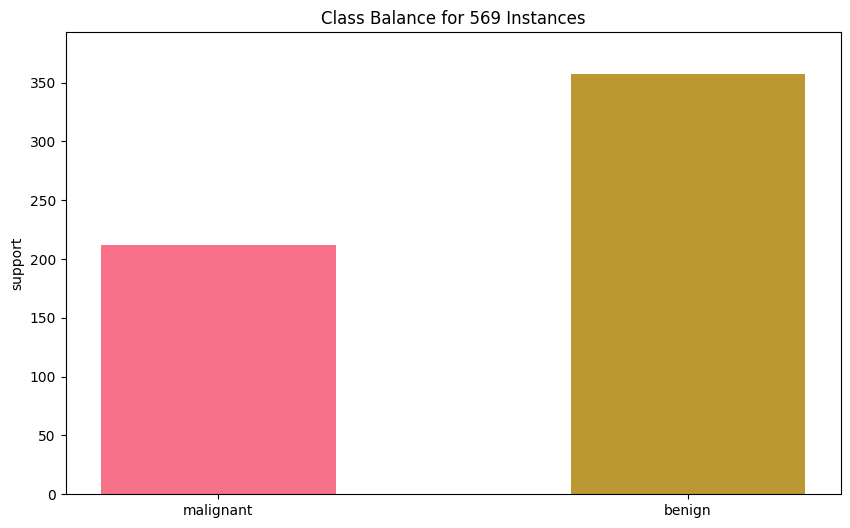

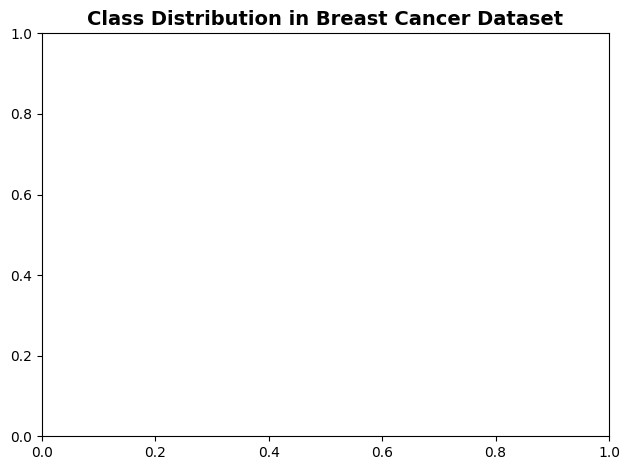


 2. Feature Analysis Visualizations


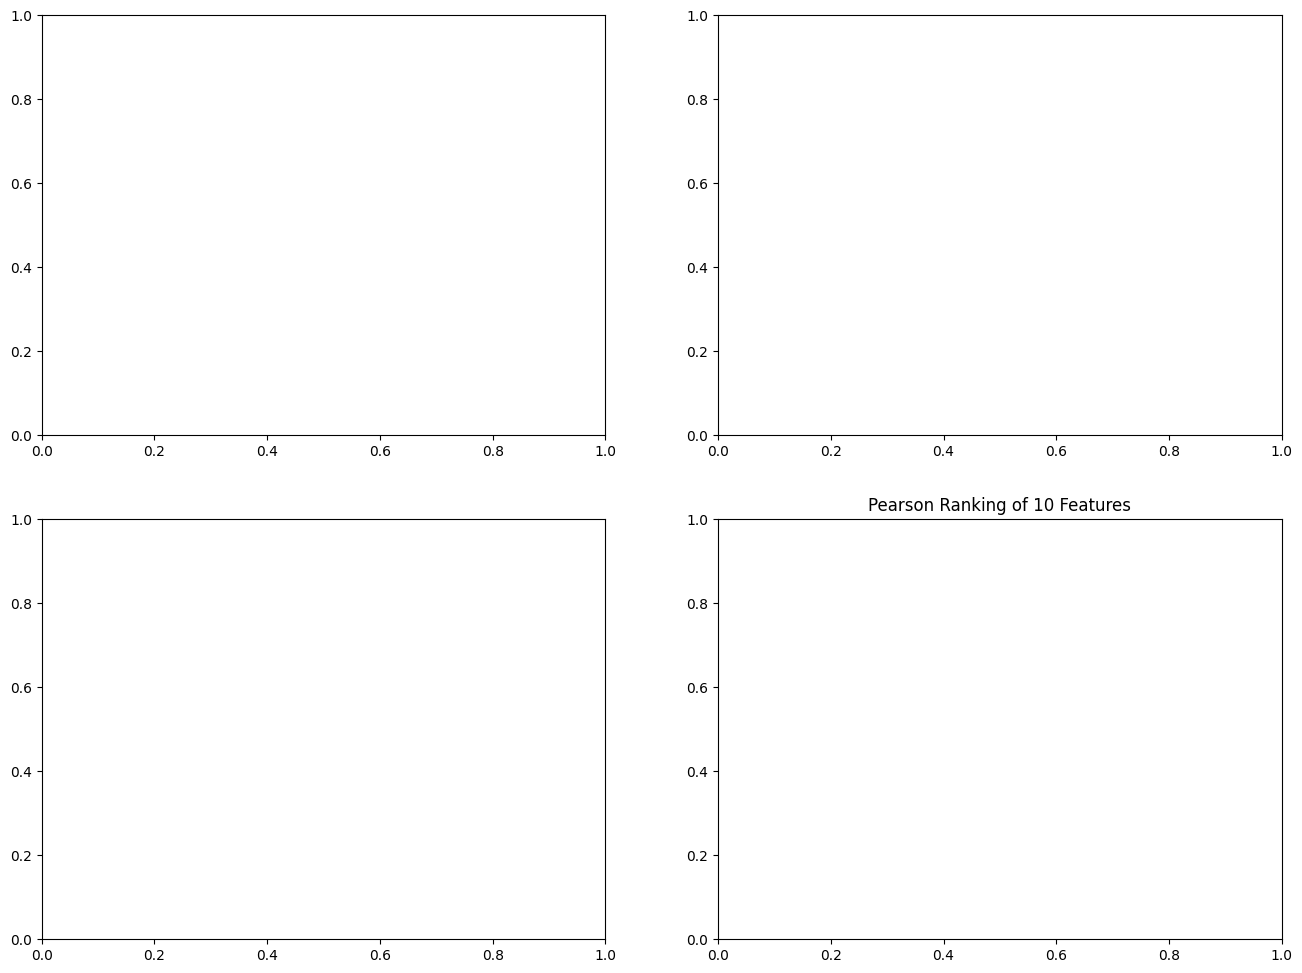

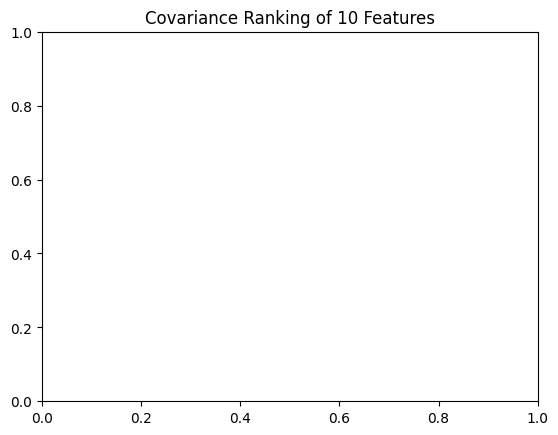

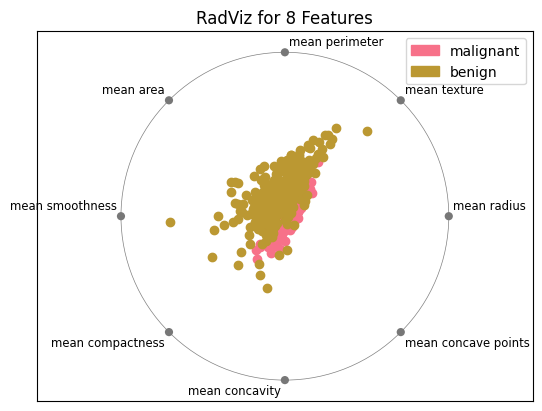

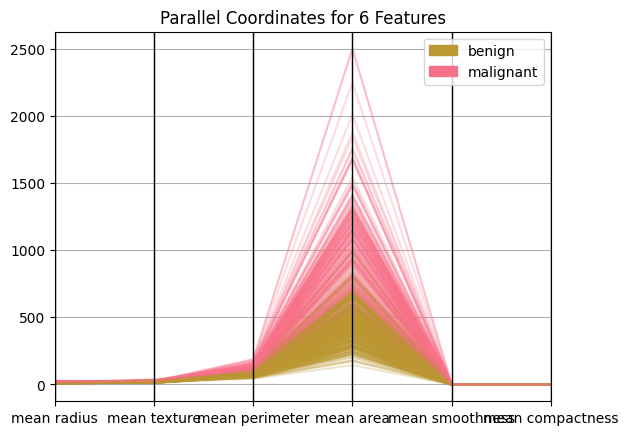

<Figure size 640x480 with 0 Axes>


 3. Dimensionality Reduction Visualizations


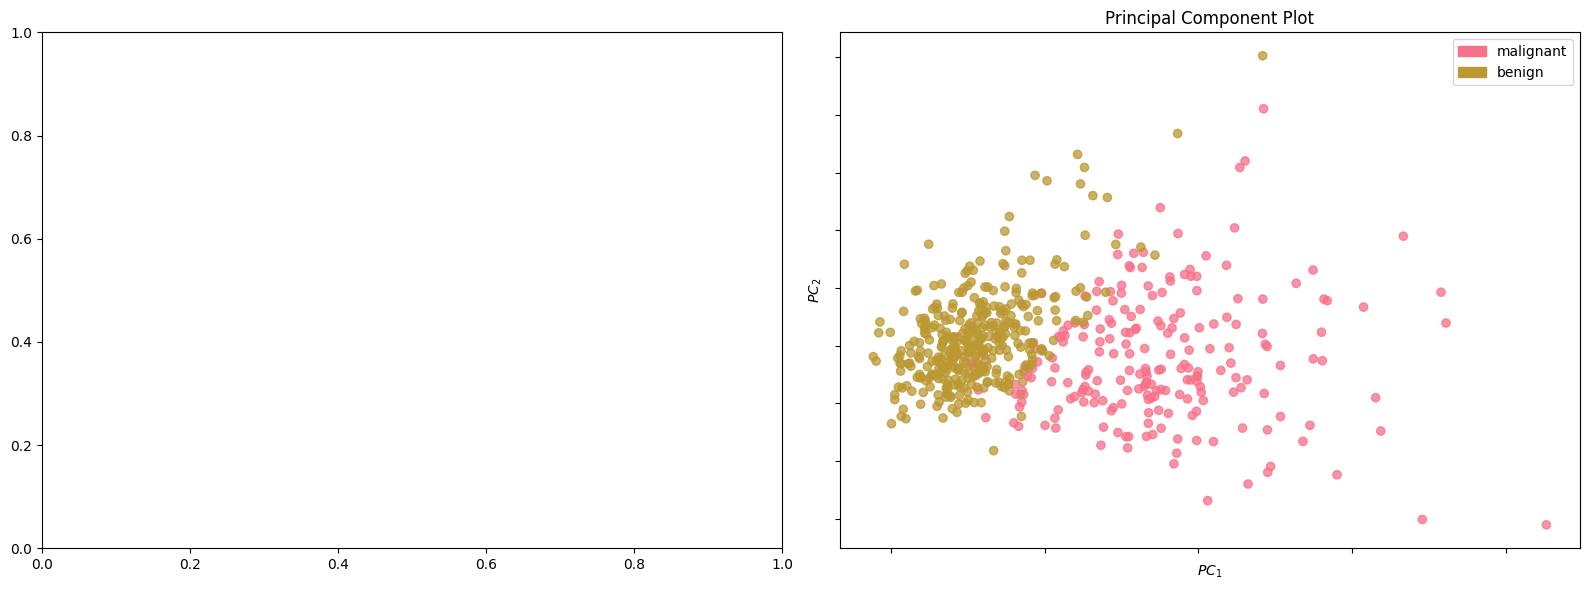

...Running t-SNE (this may take a moment)...


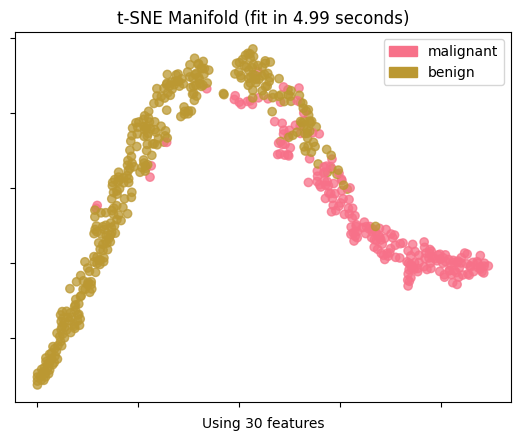

<Figure size 640x480 with 0 Axes>


 4. Clustering Analysis
...Computing elbow method...


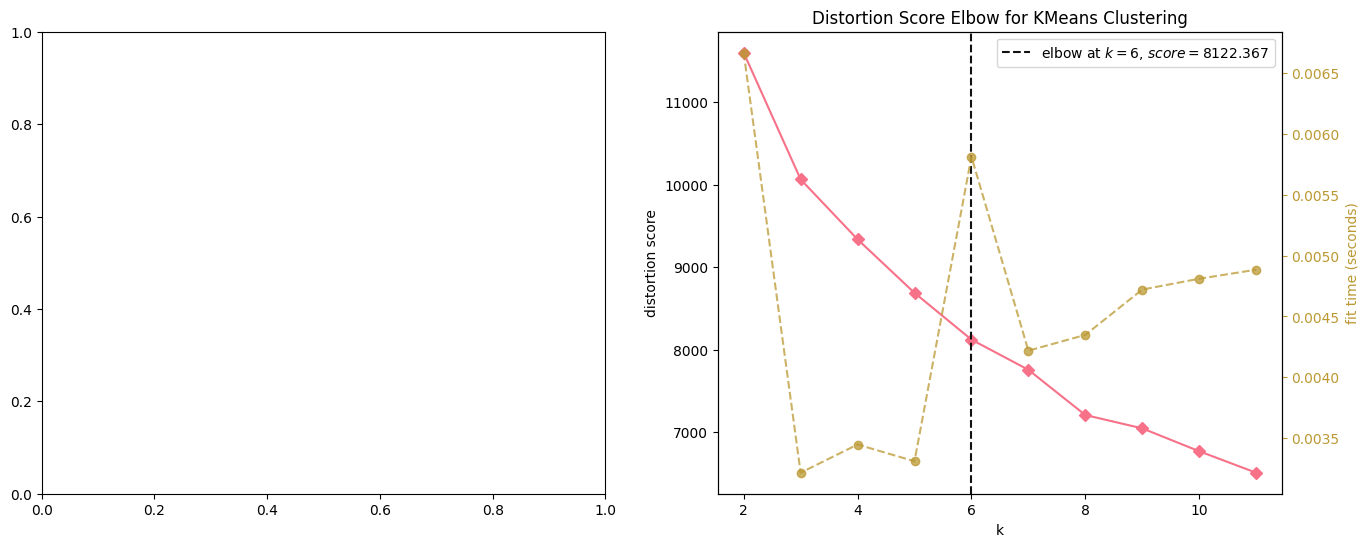

...Computing silhouette analysis...


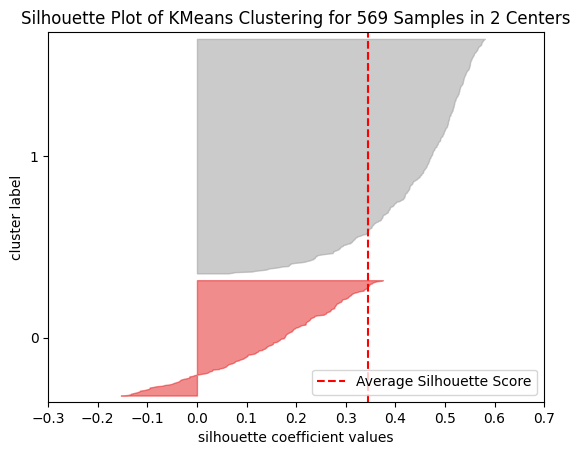

<Figure size 640x480 with 0 Axes>


 5. Model Evaluation Visualizations

--- Random Forest Evaluation ---
   Training Random Forest...


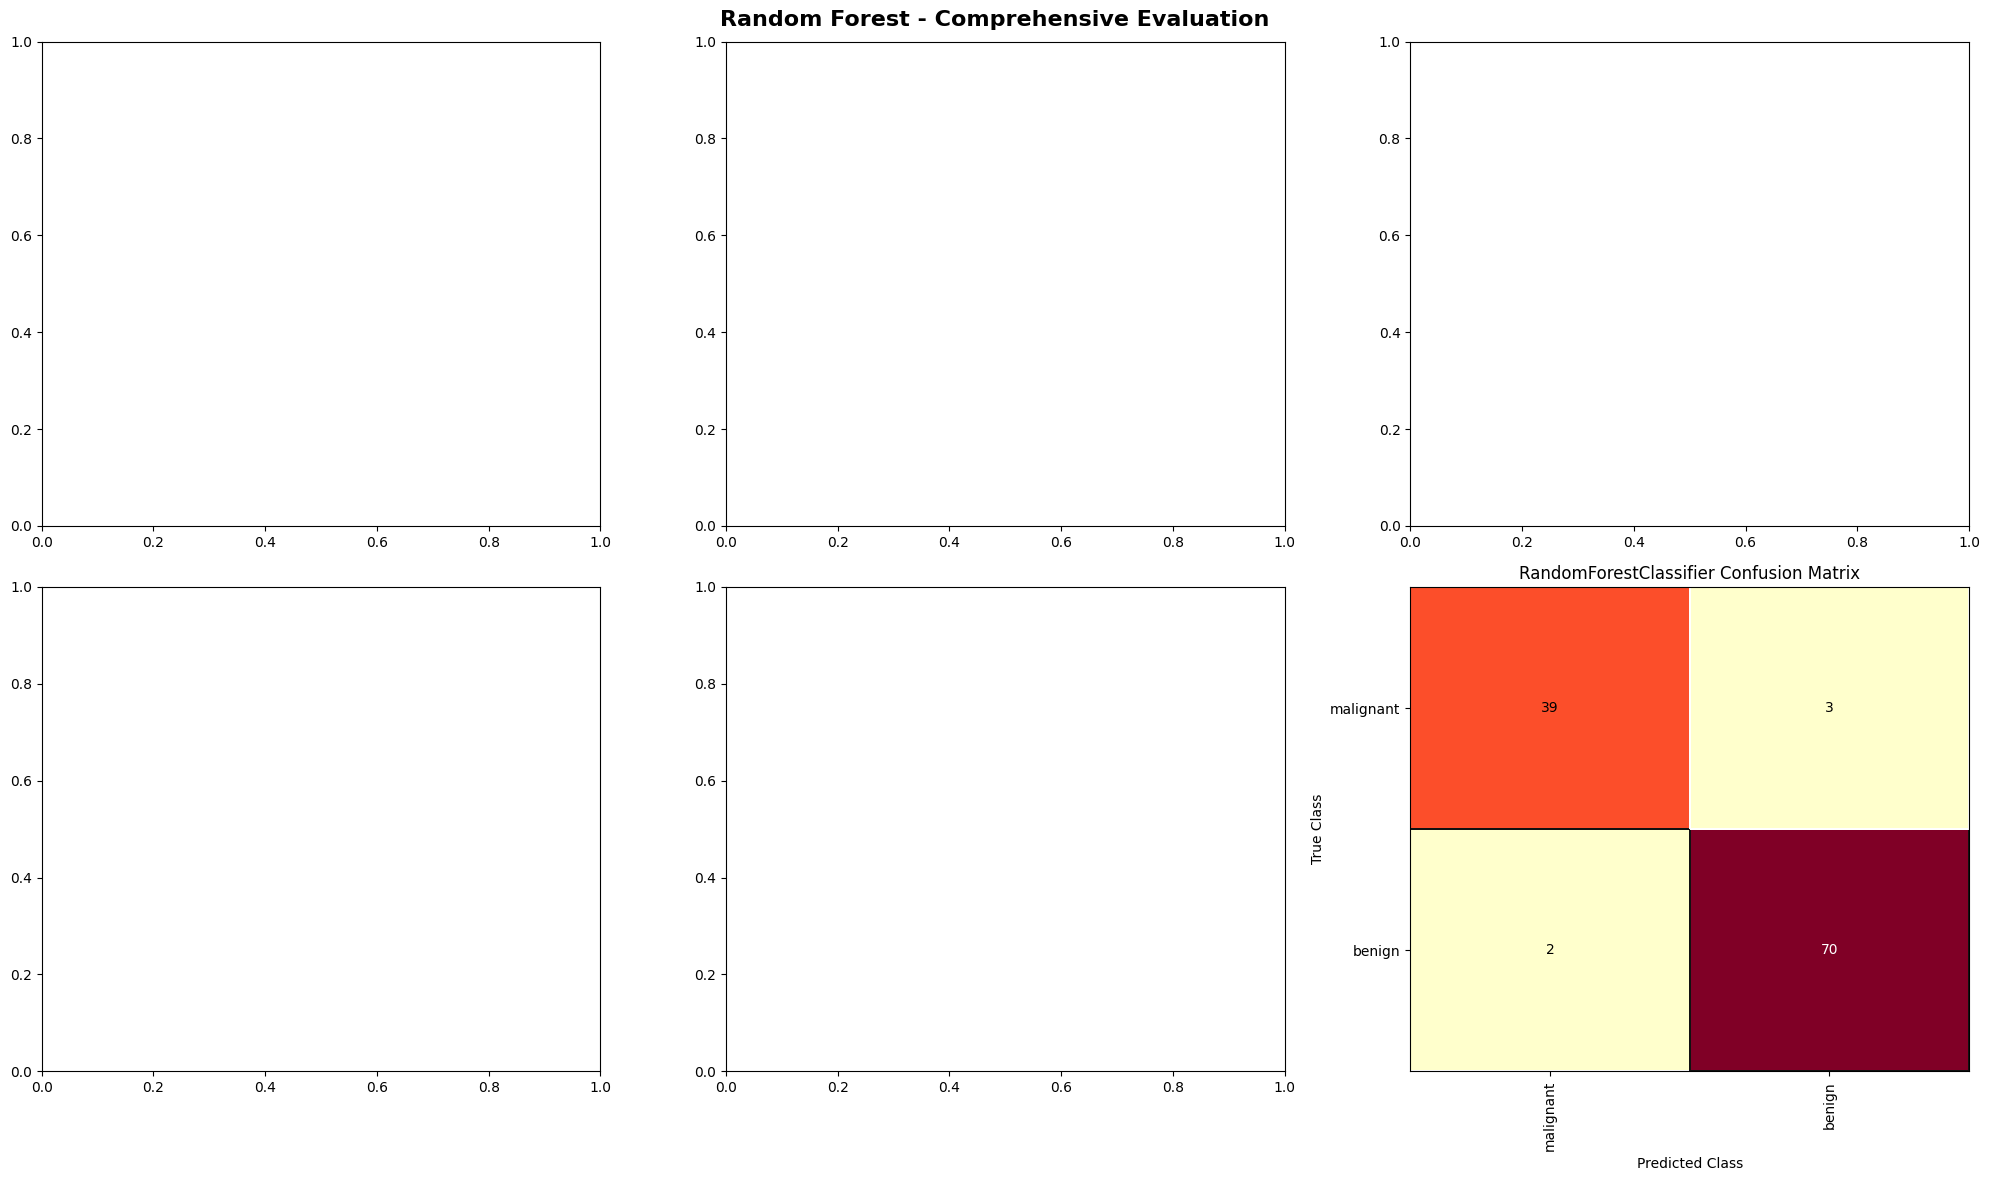

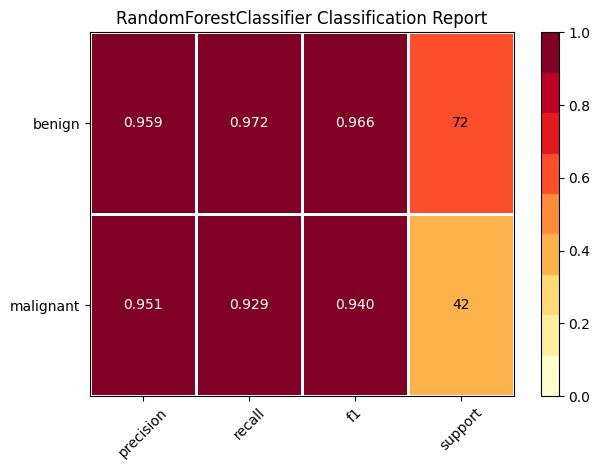

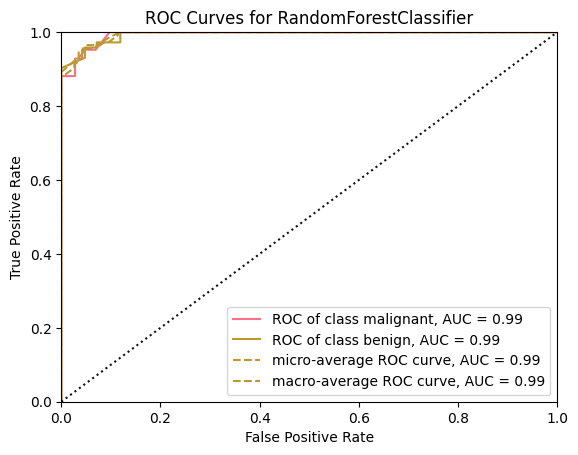

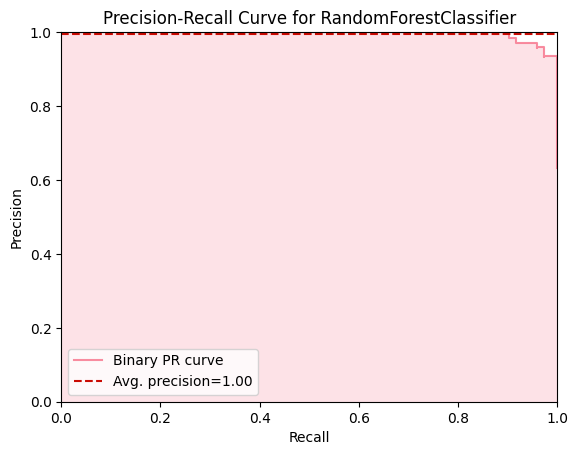

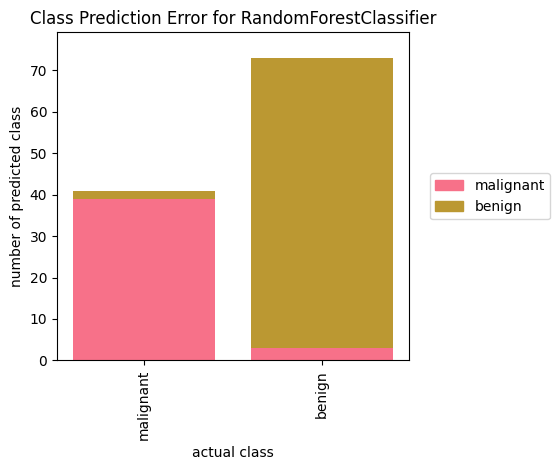

... Computing learning curve for Random Forest...


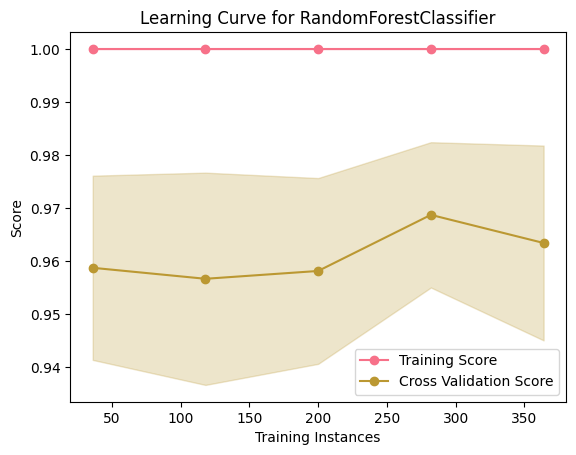

<Figure size 640x480 with 0 Axes>


--- Logistic Regression Evaluation ---
   Training Logistic Regression...


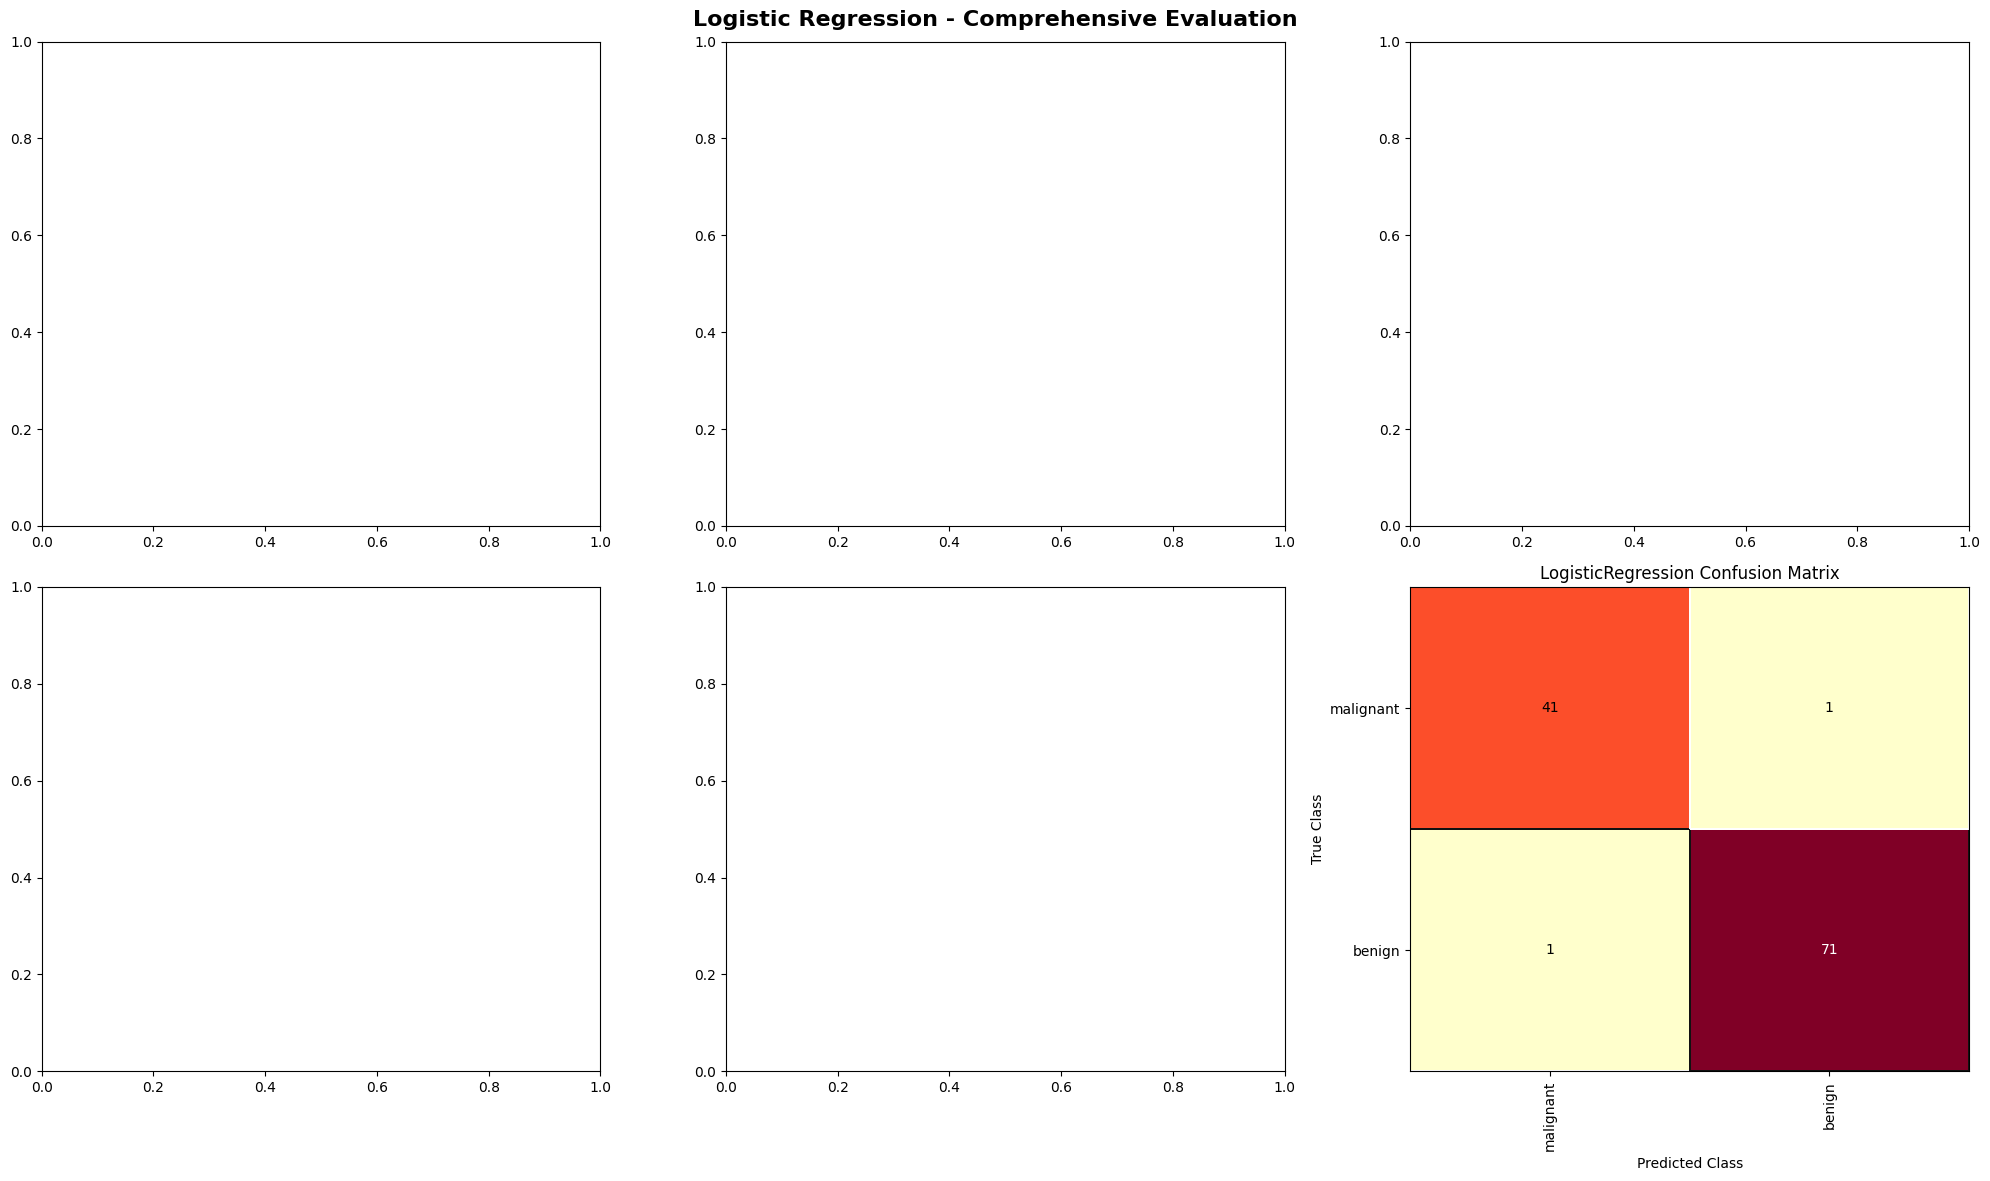

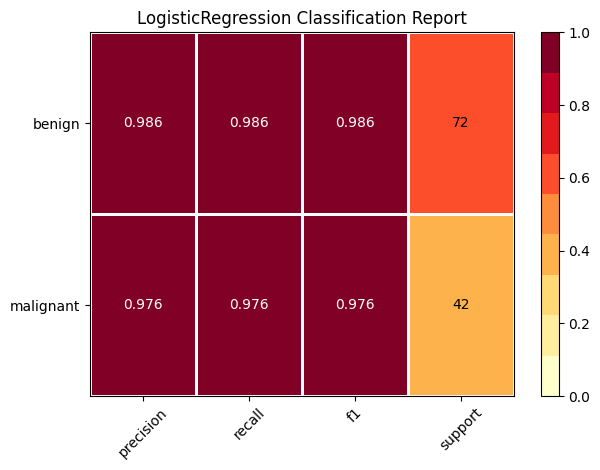

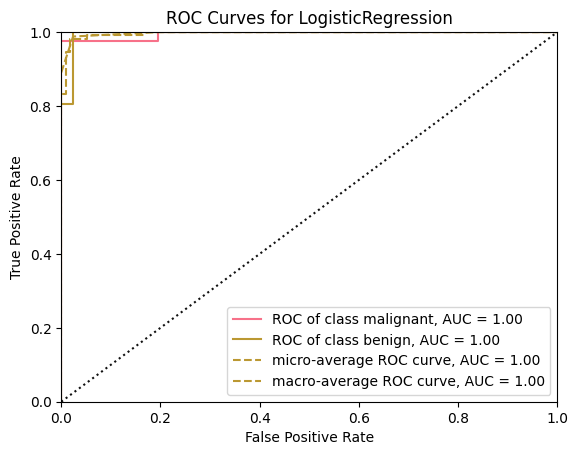

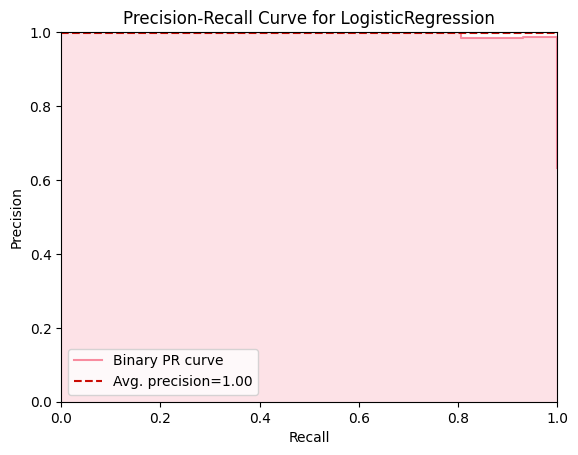

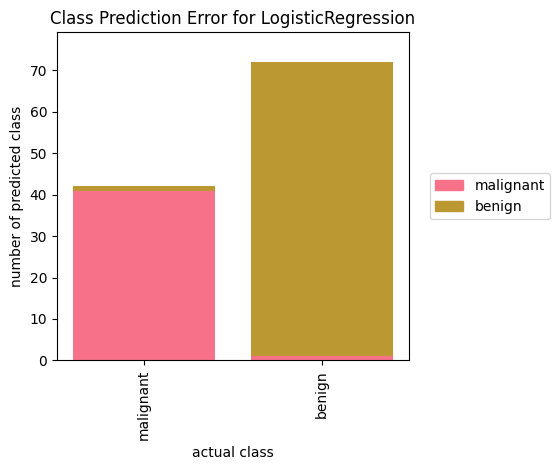

... Computing learning curve for Logistic Regression...


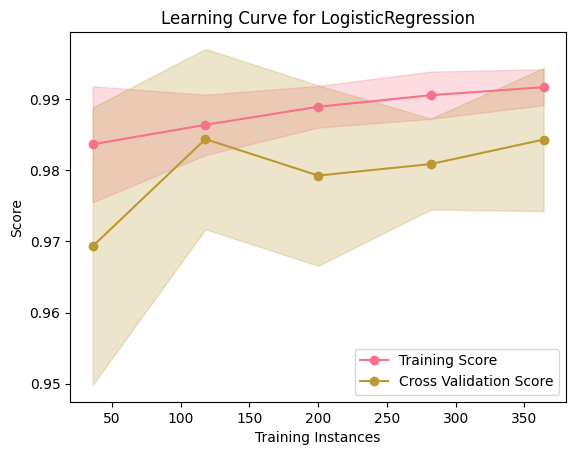

<Figure size 640x480 with 0 Axes>


--- SVM Evaluation ---
   Training SVM...


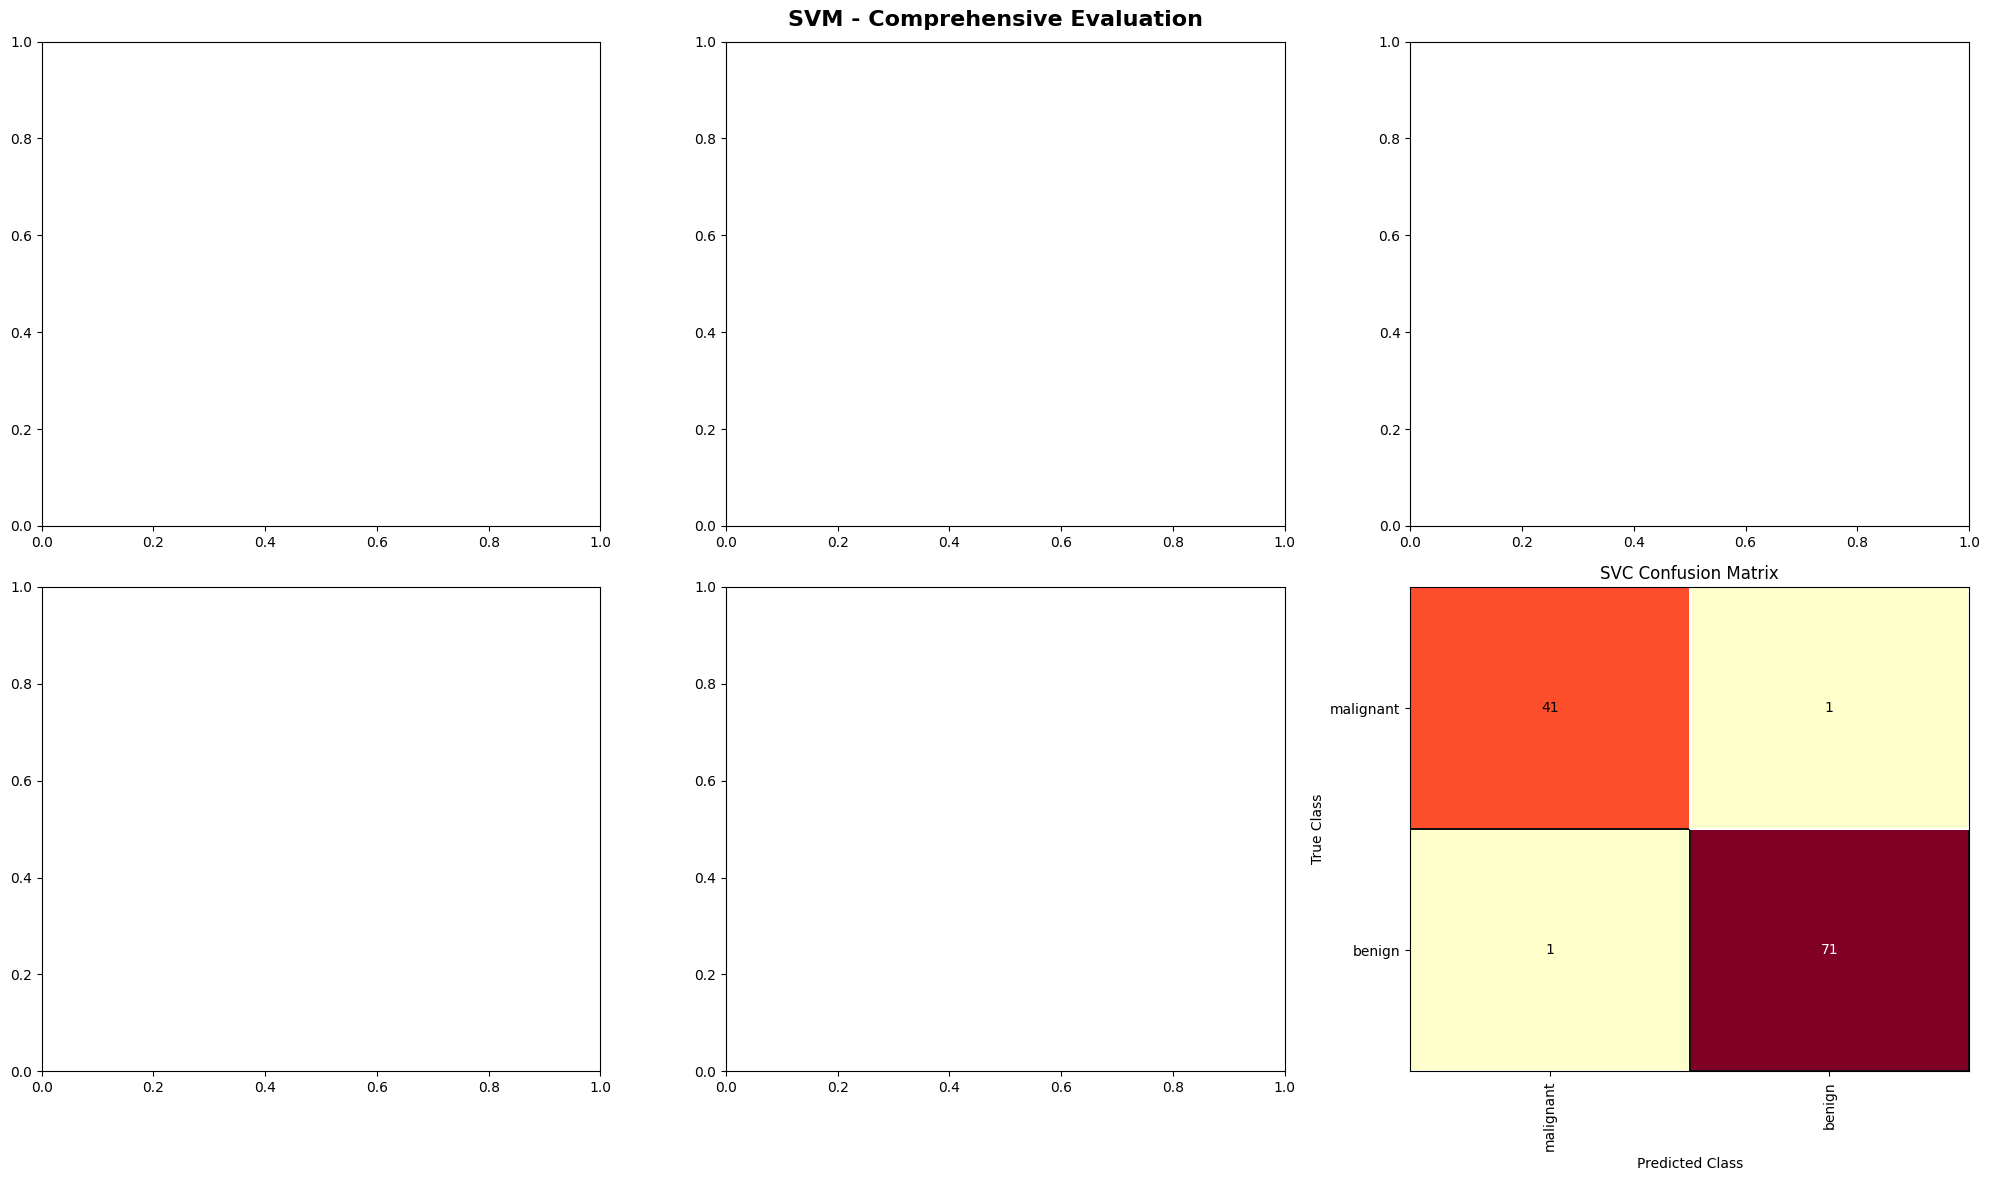

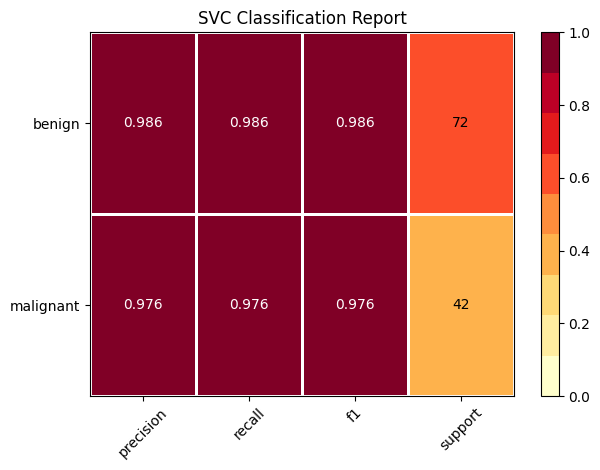

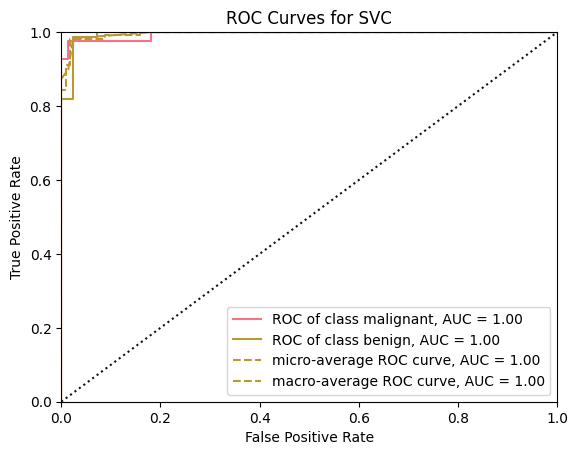

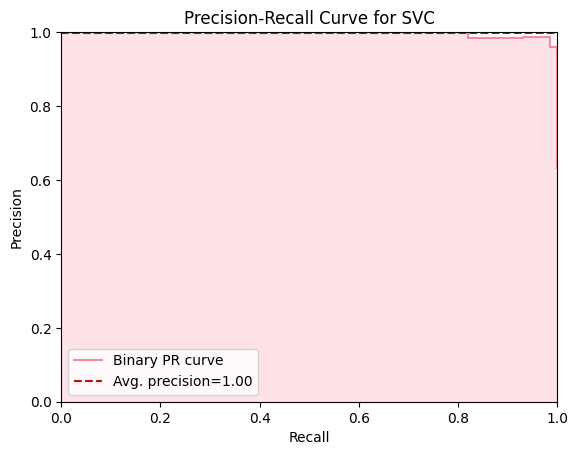

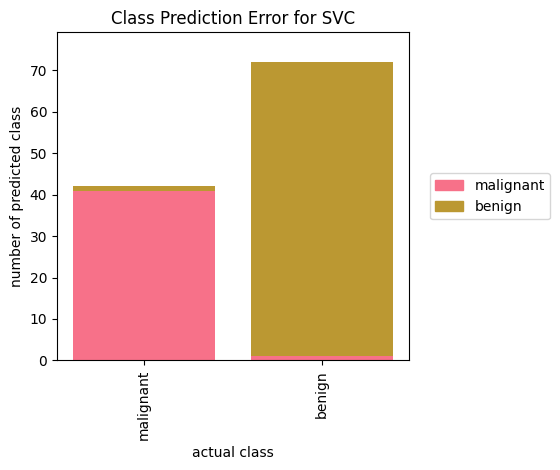

... Computing learning curve for SVM...


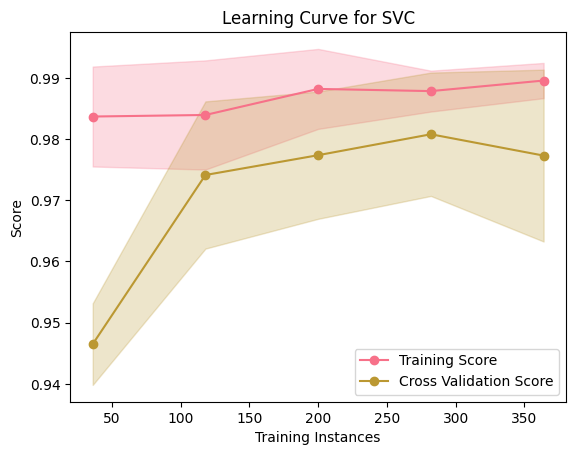

<Figure size 640x480 with 0 Axes>


 6. Model Selection & Validation
   Computing validation curve...


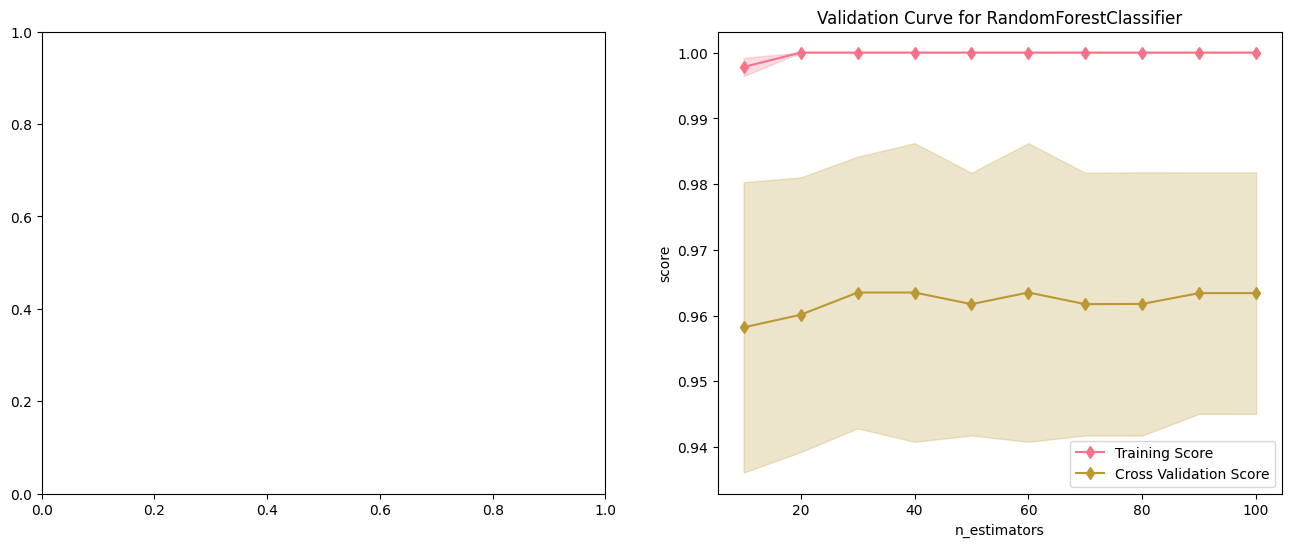

   Computing cross-validation scores...


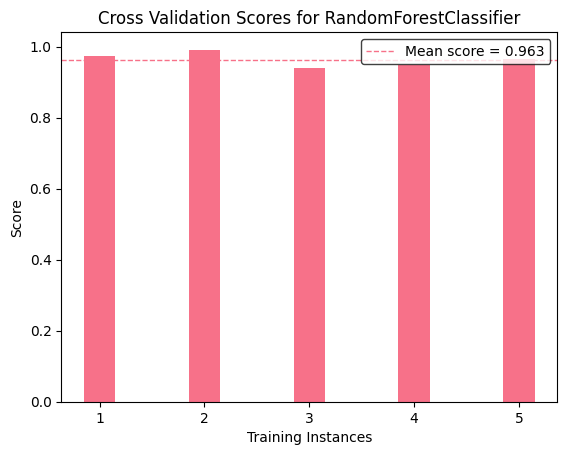

<Figure size 640x480 with 0 Axes>


 Key Insights Summary
📊 Dataset Overview:
   • Total samples: 569
   • Features: 30
   • Malignant cases: 212 (37.3%)
   • Benign cases: 357 (62.7%)

🔍 Feature Analysis:
   • Most correlated features with target:
     1. worst concave points: 0.794
     2. worst perimeter: 0.783
     3. mean concave points: 0.777

🤖 Model Performance Preview:
   • Random Forest F1-Score: 0.967 (±0.014)
   • This suggests excellent predictive capability

✨ Demo Complete!
These visualizations make machine learning models more interpretable
and help both technical and non-technical stakeholders understand
model behavior, performance, and decision-making processes.


In [20]:
def main():
    """Main execution function"""
    print("🚀 Yellowbrick Machine Learning Visualization Demo")
    print("=" * 60)
    print("Making ML models visually explainable for everyone!")
    print()

    # Load data
    X, y, data = load_and_explore_data()

    # Run all visualizations
    visualize_target_distribution(y, data)
    feature_analysis_visualizations(X, y, data)
    dimensionality_reduction_viz(X, y, data)
    clustering_analysis(X)
    model_evaluation_visualizations(X, y, data)
    model_selection_visualizations(X, y)
    create_summary_insights(X, y, data)

    print("\n✨ Demo Complete!")
    print("These visualizations make machine learning models more interpretable")
    print("and help both technical and non-technical stakeholders understand")
    print("model behavior, performance, and decision-making processes.")

if __name__ == "__main__":
    main()